In [38]:
import anndata
import numpy as np
import pandas as pd
from pathlib import Path, PureWindowsPath

import matplotlib.pyplot as plt
from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

In [25]:
download_base = Path('../../data/abc_atlas')
abc_cache = AbcProjectCache.from_cache_dir(download_base)

abc_cache.current_manifest

'releases/20240831/manifest.json'

In [2]:
pd.set_option('display.max_columns', None)

In [233]:
cluster_details = abc_cache.get_metadata_dataframe(
    directory='WMB-taxonomy',
    file_name='cluster_to_cluster_annotation_membership_pivoted',
    keep_default_na=False
)
cluster_details.set_index('cluster_alias', inplace=True)
cluster_details

,neurotransmitter,class,subclass,supertype,cluster
cluster_alias,,,,,
1,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0326 L2 IT PPP-APr Glut_3
2,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0327 L2 IT PPP-APr Glut_3
3,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0081 L2 IT PPP-APr Glut_2,0322 L2 IT PPP-APr Glut_2
4,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0081 L2 IT PPP-APr Glut_2,0323 L2 IT PPP-APr Glut_2
5,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0081 L2 IT PPP-APr Glut_2,0325 L2 IT PPP-APr Glut_2
...,...,...,...,...,...
34368,GABA-Glyc,27 MY GABA,288 MDRN Hoxb5 Ebf2 Gly-Gaba,1102 MDRN Hoxb5 Ebf2 Gly-Gaba_1,4955 MDRN Hoxb5 Ebf2 Gly-Gaba_1
34372,GABA-Glyc,27 MY GABA,285 MY Lhx1 Gly-Gaba,1091 MY Lhx1 Gly-Gaba_3,4901 MY Lhx1 Gly-Gaba_3
34374,GABA-Glyc,27 MY GABA,285 MY Lhx1 Gly-Gaba,1091 MY Lhx1 Gly-Gaba_3,4902 MY Lhx1 Gly-Gaba_3


In [234]:
cluster_colors = abc_cache.get_metadata_dataframe(
    directory='WMB-taxonomy',
    file_name='cluster_to_cluster_annotation_membership_color'
)
cluster_colors.set_index('cluster_alias', inplace=True)
cluster_details = cluster_details.join(cluster_colors)
cluster_details.reset_index(inplace=True)

In [235]:
cluster_details['supertype_label'] = [name[5:] for name in cluster_details['supertype']]

In [236]:
tax_path = Path(
    "/allen/programs/celltypes/workgroups/rnaseqanalysis/Kelly/"
    "Aging_RNA_16roi_V3/cl.df.clean_clustercombined_v240514_includesoldlabels_20241008.csv"
)
taxonomy = pd.read_csv(tax_path)

In [240]:
pd.NA

<NA>

In [254]:
taxonomy["class_color"] = pd.NA
taxonomy["subclass_color"] = pd.NA
taxonomy["supertype_color"] = pd.NA
taxonomy["neurotransmitter_color"] = pd.NA

for idx, tax_row in taxonomy.iterrows():
    WMB_row = cluster_details[tax_row['supertype_label'] == cluster_details['supertype_label']].iloc[0]
    taxonomy.loc[idx, 'class_color'] = WMB_row["class_color"]
    taxonomy.loc[idx, 'subclass_color'] = WMB_row["subclass_color"]
    taxonomy.loc[idx, 'supertype_color'] = WMB_row["supertype_color"]
    taxonomy.loc[idx, 'neurotransmitter_color'] = WMB_row["neurotransmitter_color"]

In [255]:
taxonomy

,cl_combined,ncell,med.gc,med.qc,med.doub,age_prop,adult_prop,max.roi,max.roi.prop,class_label,subclass_label,max.lib.prop,max.donor.prop,class_id,subclass_id,supertype_label,supertype_id,cl,cluster_label,old_cluster_label,markers_subclass,markers_supertype,markers_umapgroup,tfs_subclass,tfs_supertype,tfs_umapgroup,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,class_color,subclass_color,supertype_color,neurotransmitter_color
0,2629_cl0916,851,7159.0,381.645215,0.094737,0.784959,0.215041,AI-CLA,0.831962,IT-ET Glut,CLA-EPd-CTX Car3 Glut,0.178613,0.216216,1,1,CLA-EPd-CTX Car3 Glut_1,1,1,1_CLA-EPd-CTX Car3 Glut_1,1_CLA-EPd-CTX Car3 Glut_1,NaN,NaN,Car3; Prkcd; Tfap2d; Col11a1; Col24a1; Oprk1; ...,NaN,NaN,Zfhx4; Satb2; Nr4a2; Cux2; Zeb2; Hlf; Neurod2;...,NaN,NaN,NaN,NaN,NaN,NaN,#FA0087,#64c2fc,#99822E,#2B93DF
1,2571_cl0916,330,7848.5,389.781926,0.110000,0.515152,0.484848,AI-CLA,0.969697,IT-ET Glut,IT EP-CLA Glut,0.242424,0.242424,1,2,IT EP-CLA Glut_1,2,2,2_IT EP-CLA Glut_1,2_IT EP-CLA Glut_1,Pdlim5; Rab3b; Ccdc3; Rmst; Npy2r; Bmpr1b; Plp...,Pdlim5; Rab3b; Rmst; Npy2r; Bmpr1b; Plpp4; Fst...,Osr1; Oprk1; Drd2; Sulf1; Slc7a11; Blnk; Pdlim...,Tox; Ovol2; Zfpm2,Tox; Ovol2; Zfpm2,Osr1; Satb2; Neurod2; Neurod6; Bcl11b; Zeb2; N...,NaN,NaN,NaN,NaN,NaN,NaN,#FA0087,#1F665D,#994563,#2B93DF
2,2572_cl0916,589,7164.0,392.006525,0.120000,0.592530,0.407470,AI-CLA,0.894737,IT-ET Glut,IT EP-CLA Glut,0.152801,0.173175,1,2,IT EP-CLA Glut_1,2,3,3_IT EP-CLA Glut_1,3_IT EP-CLA Glut_1,Csrnp1; Adgrd1; Fos; Ptgs2; Nptx2; Cdkn1a; Osb...,Csrnp1; Adgrd1; Fos; Ptgs2; Nptx2; Lipg; Cdkn1...,Car12; Sulf1; Sema5b; Lipg; Adgrd1; Drd1; Plek...,Fos; Fosb; Nfil3; Tox; Nr4a1; Fosl2; Ovol2,Fos; Fosb; Tox; Nr4a1; Fosl2; Ovol2; Nfil3,Satb2; Nr4a2; Bcl11b; Nfia; Zeb2; Sox5; Neurod...,NaN,NaN,NaN,NaN,NaN,NaN,#FA0087,#1F665D,#994563,#2B93DF
3,2574_cl0916,207,7667.0,392.706547,0.120000,0.483092,0.516908,AI-CLA,0.971014,IT-ET Glut,IT EP-CLA Glut,0.193237,0.231884,1,2,IT EP-CLA Glut_1,2,4,4_IT EP-CLA Glut_1,4_IT EP-CLA Glut_1,Pantr1; Pou3f3; Zfhx4; Rbms1; Arhgap25; Man1a;...,Pantr1; Pou3f3; Man1a; Zfhx4; Nr2f2; Rbms1; Ar...,Oprk1; Osr1; Sulf1; Sema5b; Rgs12; C1ql3; Cwh4...,Pou3f3; Zfhx4; Nr2f2; Tox; Ovol2,Pou3f3; Zfhx4; Nr2f2; Tox; Ovol2,Osr1; Satb2; Neurod6; Nr4a2; Neurod2; Bcl11b; ...,NaN,NaN,NaN,NaN,NaN,NaN,#FA0087,#1F665D,#994563,#2B93DF
4,2576_cl0916,2141,7779.0,387.443912,0.094737,0.694068,0.305932,AI-CLA,0.987389,IT-ET Glut,IT EP-CLA Glut,0.193368,0.211583,1,2,IT EP-CLA Glut_1,2,5,5_IT EP-CLA Glut_1,5_IT EP-CLA Glut_1,Spag16; Chrdl1; Lhfp; Ndrg1; Tll2; Npsr1; Sema...,Chrdl1; Ndrg1; Spag16; Npsr1; Drd2; Asic4; Oxt...,Spag16; Tll2; Osr1; Oprk1; Chrdl1; Sulf1; Npsr...,Tox,Tox,Osr1; Satb2; Neurod2; Bcl11b; Neurod6; Zeb2; N...,NaN,NaN,NaN,NaN,NaN,NaN,#FA0087,#1F665D,#994563,#2B93DF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,61_climmune,2640,3305.0,249.296560,0.020619,0.973106,0.026894,PONS - Pmot-Psat ant,0.454167,Immune,Microglia NN,0.237500,0.310985,25,169,Microglia NN_1,429,843,843_Microglia NN_1,8_Microglia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#825f45,#CC1F4E,#62CC3D,#666666
843,66_climmune,771,2742.0,213.391070,0.061224,0.631647,0.368353,AI-CLA,0.263294,Immune,Microglia NN,0.156939,0.245136,25,169,Microglia NN_1,429,844,844_Microglia NN_1,9_Microglia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#825f45,#CC1F4E,#62CC3D,#666666
844,36_climmune,3030,3116.0,248.876703,0.040000,0.517492,0.482508,ENT,0.212541,Immune,BAM NN,0.045875,0.073597,25,170,BAM NN_1,430,845,845_BAM NN_1,3_BAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#825f45,#66493D,#32662E,#666666
845,16_climmune,248,3248.0,267.024716,0.025479,0.604839,0.395161,ENT,0.298387,Immune,DC NN,0.072581,0.080645,25,171,DC NN_1,431,846,846_DC NN_1,1_DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#825f45,#CCA27A,#FF999F,#666666


In [266]:
sub_taxonomy = [
    taxonomy[taxonomy['supertype_label'] == supertype].iloc[0].to_dict() for supertype in taxonomy['supertype_label'].unique()
]

In [273]:
supertype_taxonomy = pd.DataFrame(data=sub_taxonomy)

In [274]:
supertype_taxonomy.set_index("supertype_label", inplace=True)

In [299]:
log2_anndata_path = Path(
    "/allen/programs/celltypes/workgroups/rnaseqanalysis/Kelly/Aging_RNA_16roi_V3/final_objects/"
    "Mouse_Aging_10Xv3_normalized_20241015.h5ad"
)
raw_anndata_path = Path(
    "/allen/programs/celltypes/workgroups/rnaseqanalysis/Kelly/Aging_RNA_16roi_V3/final_objects/"
    "Mouse_Aging_10Xv3_counts_20241015.h5ad"
)

In [300]:
log2_data = anndata.read_h5ad(log2_anndata_path, backed='r')
raw_data = anndata.read_h5ad(log2_anndata_path, backed='r')

In [35]:
cells_with_umap = log2_data.obs.join(log2_data.obsm['X_umap'])

In [39]:
cells_with_umap['age_color'] = np.where(cells_with_umap['age_cat'] == "adult", "#9ACD32", "#B22222")

In [256]:
cells_with_umap

,class_label,subclass_label,supertype_label,cluster_label,library_prep,broad_roi,roi,sex,age_cat,external_donor_name,facs_population_plan,gene.counts.0,doublet_score,umi.counts,umap1,umap2,age_color
sample_id,,,,,,,,,,,,,,,,,
AAACCCAAGGCACGAT-L8TX_190725_01_A09-1178165423,MB GABA,SC-PAG Lef1 Emx2 Gaba,SC-PAG Lef1 Emx2 Gaba_2,599_SC-PAG Lef1 Emx2 Gaba_2,L8TX_190725_01_A09,Midbrain,MB - PAG-RAmb,M,adult,473981,"RFP-positive, DAPI-negative",7002,0.2900,29262,-11.631238,5.529424,#9ACD32
AAACCCATCAAATAGG-L8TX_190725_01_A09-1178165423,MB Glut,IF-RL-CLI-PAG Foxa1 Glut,IF-RL-CLI-PAG Foxa1 Glut_4,425_IF-RL-CLI-PAG Foxa1 Glut_4,L8TX_190725_01_A09,Midbrain,MB - PAG-RAmb,M,adult,473981,"RFP-positive, DAPI-negative",6300,0.1600,22838,-4.561319,8.795810,#9ACD32
AAACCCATCTCATGGA-L8TX_190725_01_A09-1178165423,MB Glut,PAG-MRN Tfap2b Glut,PAG-MRN Tfap2b Glut_1,468_PAG-MRN Tfap2b Glut_1,L8TX_190725_01_A09,Midbrain,MB - PAG-RAmb,M,adult,473981,"RFP-positive, DAPI-negative",7260,0.1500,33630,-7.981854,9.037793,#9ACD32
AAACGAAAGCATCTTG-L8TX_190725_01_A09-1178165423,OPC-Oligo,Oligo NN,MOL NN_4,817_MOL NN_4,L8TX_190725_01_A09,Midbrain,MB - PAG-RAmb,M,adult,473981,"RFP-positive, DAPI-negative",3822,0.0400,12370,13.590621,1.441468,#9ACD32
AAACGAAAGCTCCATA-L8TX_190725_01_A09-1178165423,MB Glut,IF-RL-CLI-PAG Foxa1 Glut,IF-RL-CLI-PAG Foxa1 Glut_2,421_IF-RL-CLI-PAG Foxa1 Glut_2,L8TX_190725_01_A09,Midbrain,MB - PAG-RAmb,M,adult,473981,"RFP-positive, DAPI-negative",6251,0.2200,22389,-5.970205,8.956449,#9ACD32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTAGCACACAG-L8TX_220421_01_G07-1178166247,NP-CT-L6b Glut,L6 CT CTX Glut,L6 CT CTX Glut_5,176_L6 CT CTX Glut_5,L8TX_220421_01_G07,Isocortex,PL-ILA-ORB,F,adult,621471,"RFP-positive, DAPI-negative",8277,0.0375,57940,-0.629850,-11.539618,#9ACD32
TTTGGTTAGTCCCAGC-L8TX_220421_01_G07-1178166247,IT-ET Glut,L6 IT CTX Glut,L6 IT CTX Glut_2,18_L6 IT CTX Glut_2,L8TX_220421_01_G07,Isocortex,PL-ILA-ORB,F,adult,621471,"RFP-positive, DAPI-negative",7092,0.0250,34066,0.703247,-8.163885,#9ACD32
TTTGGTTGTATGTGTC-L8TX_220421_01_G07-1178166247,CTX-CGE GABA,Lamp5 Gaba,Lamp5 Gaba_1,226_Lamp5 Gaba_1,L8TX_220421_01_G07,Isocortex,PL-ILA-ORB,F,adult,621471,"RFP-positive, DAPI-negative",7004,0.0500,32221,-8.132657,-0.810616,#9ACD32


In [277]:
cells_with_colors_umap = cells_with_umap.join(supertype_taxonomy, on="supertype_label", rsuffix="tax")

In [296]:
cells_with_colors_umap['roi'].unique()

array(['MB - PAG-RAmb', 'PONS - Pmot-Psat ant', 'PONS - Pmot-Psat post',
       'MB - VTA-SN', 'CNU - PAL', 'RSP', 'HY -  MEZ-PVZ-PVR', 'ACA',
       'AI-CLA', 'STR - STRd', 'STR - STRv', 'ENT', 'HIP', 'HIP - CA',
       'STR - sAMY', 'HY - HYpm', 'HY - HYmm', 'HY - HYa2', 'HY LZ',
       'HY - HYm2', 'PAR-POST-PRE-SUB-ProS', 'PL-ILA-ORB'], dtype=object)

In [288]:
roi = abc_cache.get_metadata_dataframe(directory='WMB-10X', file_name='region_of_interest_metadata')
roi.rename(columns={'order': 'region_of_interest_order',
                    'color_hex_triplet': 'region_of_interest_color',
                    'acronym': 'roi'
                   },
           inplace=True)
roi

,label,roi,name,region_of_interest_order,region_of_interest_color
0,WMB-MO-FRP,MO-FRP,Somatomotor - Frontal pole,0,#3DCC7C
1,WMB-MOp,MOp,Primary motor area,1,#179968
2,WMB-SS-GU-VISC,SS-GU-VISC,Somatosensory/gustatory/visceral areas,2,#2E8599
3,WMB-SSp,SSp,Primary somatosensory area,3,#5CCCCC
4,WMB-AUD,AUD,Auditory areas,4,#455A99
5,WMB-AUD-TEa-PERI-ECT,AUD-TEa-PERI-ECT,Auditory/temporal/perirhinal/ectorhinal areas,5,#84FF4D
6,WMB-VIS-PTLp,VIS-PTLp,Visual/posterior parietal areas,6,#26AEFF
7,WMB-VIS,VIS,Visual areas,7,#0059CC
8,WMB-ACA,ACA,Anterior cingulate area,8,#00990A
9,WMB-PL-ILA-ORB,PL-ILA-ORB,Prelimbic/infralimbic/orbital areas,9,#8CCC00


In [290]:
cells_with_colors_umap = cells_with_colors_umap.join(roi[['region_of_interest_order', 'region_of_interest_color']], on='roi')

In [294]:
pd.isna(cells_with_colors_umap['region_of_interest_color']).sum()

np.int64(1162568)

In [279]:
def plot_umap(xx, yy, cc=None, val=None, fig_width=8, fig_height=8, cmap=None):

    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height)
    
    if cmap is not None :
        plt.scatter(xx, yy, s=0.05, c=val, marker='.', cmap=cmap)
    elif cc is not None :
        plt.scatter(xx, yy, s=0.05, color=cc, marker='.')
    else:
        plt.scatter(xx, yy, s=0.05, marker='.')
        
    ax.axis('equal')
    ax.set_xlim(-18, 27)
    ax.set_ylim(-18, 27)
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig, ax

(<Figure size 800x800 with 1 Axes>, <Axes: >)

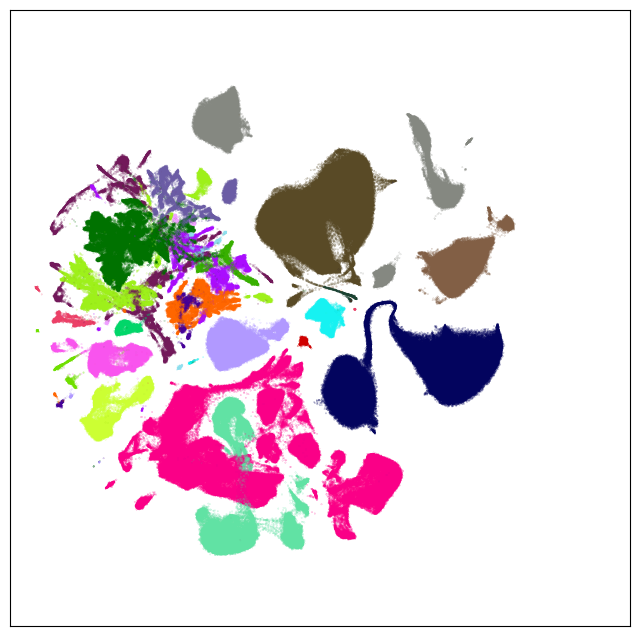

In [280]:
plot_umap(
    cells_with_colors_umap['umap1'],
    cells_with_colors_umap['umap2'],
    cc=cells_with_colors_umap['class_color']
)

(<Figure size 800x800 with 1 Axes>, <Axes: >)

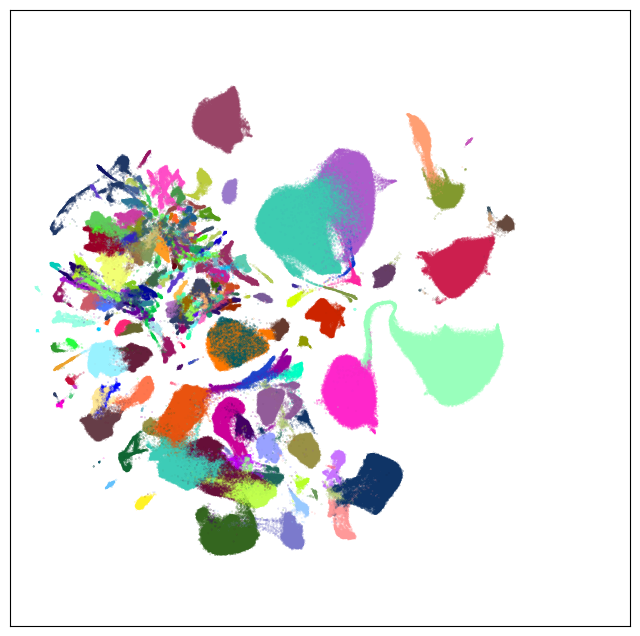

In [281]:
plot_umap(
    cells_with_colors_umap['umap1'],
    cells_with_colors_umap['umap2'],
    cc=cells_with_colors_umap['subclass_color']
)

(<Figure size 800x800 with 1 Axes>, <Axes: >)

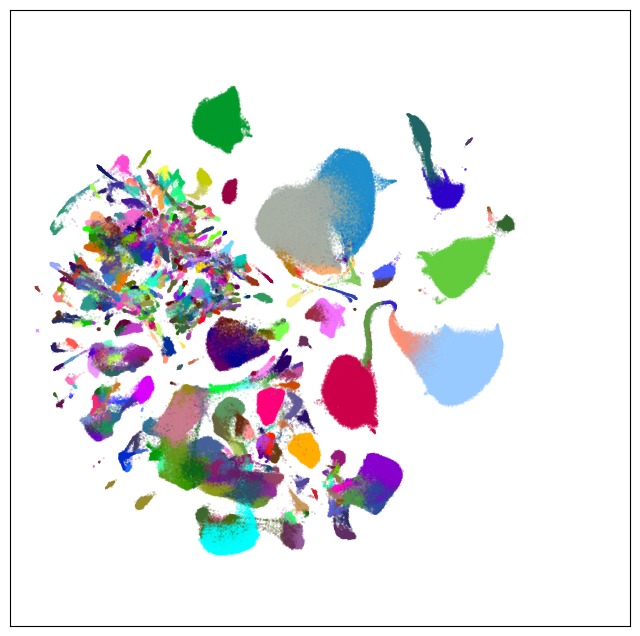

In [282]:
plot_umap(
    cells_with_colors_umap['umap1'],
    cells_with_colors_umap['umap2'],
    cc=cells_with_colors_umap['supertype_color']
)

(<Figure size 800x800 with 1 Axes>, <Axes: >)

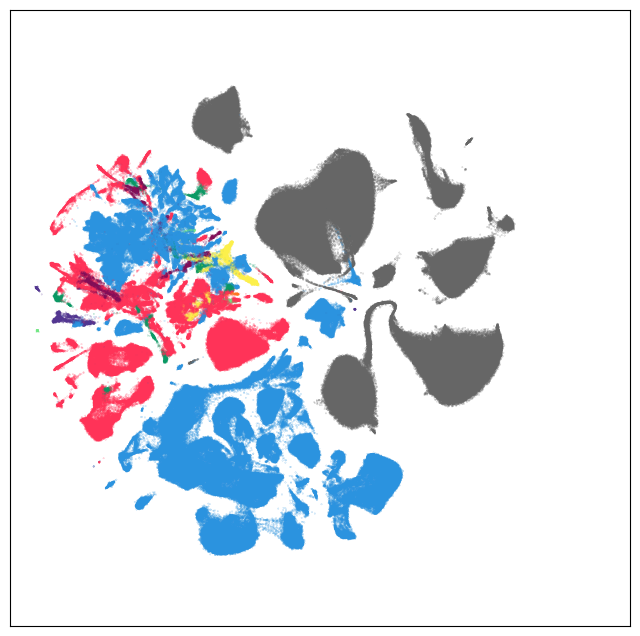

In [284]:
plot_umap(
    cells_with_colors_umap['umap1'],
    cells_with_colors_umap['umap2'],
    cc=cells_with_colors_umap['neurotransmitter_color']
)

In [297]:
WMB_gene = abc_cache.get_metadata_dataframe(
    directory='WMB-10X',
    file_name='gene'
)

gene.csv: 100%|███████████████████████████████████████████████████████████████████████████| 2.30M/2.30M [00:00<00:00, 4.77MMB/s]


In [302]:
WMB_gene.set_index('gene_symbol', inplace=True)

In [337]:
unmatched_WMB = WMB_gene[~(log2_data.var.index == WMB_gene.index)]
unmatched_tax = pd.DataFrame(data=
    [{"aging_symbol": value.split()[0], "aging_ID": value.split()[1]}
     for value in log2_data.var[~(log2_data.var.index == WMB_gene.index)].index]
)
unmatched_WMB['aging_symbol'] = unmatched_tax['aging_symbol'].to_numpy()
unmatched_WMB['aging_ID'] = unmatched_tax['aging_ID'].to_numpy()

/tmp/ipykernel_25017/3143880350.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unmatched_WMB['aging_symbol'] = unmatched_tax['aging_symbol'].to_numpy()
/tmp/ipykernel_25017/3143880350.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unmatched_WMB['aging_ID'] = unmatched_tax['aging_ID'].to_numpy()


In [340]:
unmatched_WMB[['aging_symbol', 'gene_identifier', 'aging_ID']]

,aging_symbol,gene_identifier,aging_ID
gene_symbol,,,
Ptp4a1,Ptp4a1,ENSMUSG00000117310,ENSMUSG00000117310
Arhgef4,Arhgef4,ENSMUSG00000118272,ENSMUSG00000118272
Sept2,Sept2,ENSMUSG00000116048,ENSMUSG00000116048
Zc3h11a,Zc3h11a,ENSMUSG00000116275,ENSMUSG00000116275
Gm16701,Gm16701,ENSMUSG00000097823,ENSMUSG00000097823
Pakap,Pakap,ENSMUSG00000038729,ENSMUSG00000038729
Gm28710,Gm28710,ENSMUSG00000099854,ENSMUSG00000099854
Jakmip1,Jakmip1,ENSMUSG00000113373,ENSMUSG00000113373
Fam220a,Fam220a,ENSMUSG00000083012,ENSMUSG00000083012


In [341]:
unmatched_WMB['gene_identifier'] == unmatched_WMB['aging_ID']

gene_symbol
Ptp4a1           True
Arhgef4          True
Sept2            True
Zc3h11a          True
Gm16701          True
Pakap            True
Gm28710          True
Jakmip1          True
Fam220a          True
Gm16499          True
Olfr290          True
Aldoa            True
Dpep2            True
Gm16364          True
C730027H18Rik    True
Ddit3            True
St6galnac2       True
Gm35558          True
Ighv5-8          True
Ighv1-13         True
Nnt              True
Gm5089           True
4930594M22Rik    True
Gm41392          True
Gm38619          True
Snhg4            True
Pcdha11          True
Gm35438          True
Btbd35f1         True
Fam90a1b         True
Ccl21b           True
Fam205a4         True
Gm3286           True
Il11ra2          True
Ccl27a           True
Ccl21c           True
Ccl27a           True
Il11ra2          True
Ccl19            True
Ccl21a           True
dtype: bool

In [326]:
unmatched_WMB[['gene_identifier', 'aging_taxonomy']].to_csv()

,gene_identifier,aging_taxonomy
gene_symbol,,
Ptp4a1,ENSMUSG00000117310,Ptp4a1 ENSMUSG00000117310
Arhgef4,ENSMUSG00000118272,Arhgef4 ENSMUSG00000118272
Sept2,ENSMUSG00000116048,Sept2 ENSMUSG00000116048
Zc3h11a,ENSMUSG00000116275,Zc3h11a ENSMUSG00000116275
Gm16701,ENSMUSG00000097823,Gm16701 ENSMUSG00000097823
Pakap,ENSMUSG00000038729,Pakap ENSMUSG00000038729
Gm28710,ENSMUSG00000099854,Gm28710 ENSMUSG00000099854
Jakmip1,ENSMUSG00000113373,Jakmip1 ENSMUSG00000113373
Fam220a,ENSMUSG00000083012,Fam220a ENSMUSG00000083012
